<a href="https://colab.research.google.com/github/ektamistry/Machine-Learning/blob/main/Exploring_Principal_Component_Analysis_(PCA)_Through_Manual_Implementation_Eigenvalues%2C_Eigenvectors%2C_and_Visualizing_PC1_and_PC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ekta Mistry

I070

Machine Learning Lab

Sem 4 - BTech AI

Link: https://colab.research.google.com/drive/1bHZO87v4TansCW1BjP2xMFLugug-BHau#scrollTo=cgqLcZN-Eav5

In [ ]:
import pandas as pd
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm' ] ]
y = df['Species']

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape

(150,)

### Compute the covariance matrix

In [ ]:
import numpy as np

In [ ]:
features = x.T
covariance_matrix = np.cov(features)

In [ ]:
covariance_matrix

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [ ]:
eig_vals, eig_vecs= np.linalg.eig(covariance_matrix)

In [ ]:
eig_vecs

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [ ]:
eig_vals

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [ ]:
eig_vals[0]/sum(eig_vals)

0.9246162071742683

In [ ]:
projected_x = x.dot(eig_vecs.T[0])

In [ ]:
projected_x

0      2.827136
1      2.795952
2      2.621524
3      2.764906
4      2.782750
         ...   
145    7.455360
146    7.037007
147    7.275389
148    7.412972
149    6.901009
Length: 150, dtype: float64

### PC1

In [ ]:
df_PCA = pd.DataFrame(projected_x, columns=['PC1'])

In [ ]:
df_PCA['y_axis']= 0.0
df_PCA['label']= y

In [ ]:
df_PCA.head()

,PC1,y_axis,label
0,2.827136,0.0,Iris-setosa
1,2.795952,0.0,Iris-setosa
2,2.621524,0.0,Iris-setosa
3,2.764906,0.0,Iris-setosa
4,2.782750,0.0,Iris-setosa


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Iris features projected on PC1')

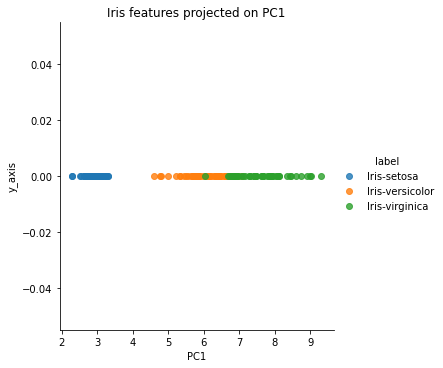

In [ ]:
sns.lmplot('PC1','y_axis', data = df_PCA, fit_reg = False, hue= 'label')
plt.title('Iris features projected on PC1')

### PC2

In [ ]:
eig_vals[1]/sum(eig_vals)

0.05301556785053501

In [ ]:
projected_x2 = x.dot(eig_vecs.T[1])

In [ ]:
df_PCA2 = pd.DataFrame(projected_x2, columns=['PC2'])

In [ ]:
df_PCA2['y_axis']= 0.0
df_PCA2['label']= y

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Iris features projected on PC2')

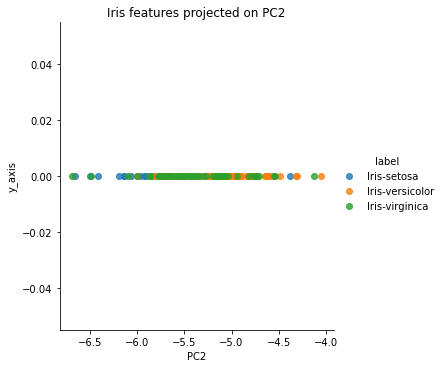

In [ ]:
sns.lmplot('PC2','y_axis', data= df_PCA2, fit_reg = False, hue= 'label')
plt.title('Iris features projected on PC2')

### PC1 and PC2 data points on a two dimenional space

In [ ]:
df_PCA_2d = pd.DataFrame(columns = ['PC1', 'PC2', ])
df_PCA_2d['PC1'] = df_PCA['PC1']
df_PCA_2d['PC2'] = df_PCA2['PC2']
df_PCA_2d['label'] = y
df_PCA_2d.head()

,PC1,PC2,label
0,2.827136,-5.641331,Iris-setosa
1,2.795952,-5.145167,Iris-setosa
2,2.621524,-5.177378,Iris-setosa
3,2.764906,-5.003599,Iris-setosa
4,2.782750,-5.648648,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


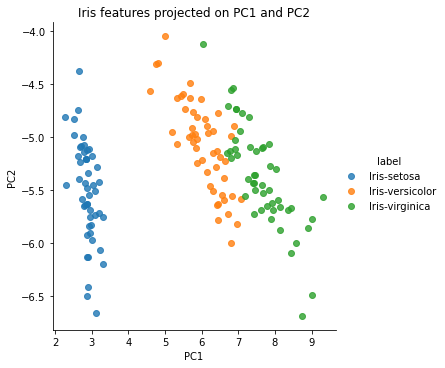

In [ ]:
sns.lmplot('PC1', 'PC2', data = df_PCA_2d, fit_reg = False, hue='label')
plt.title('Iris features projected on PC1 and PC2')
plt.show()

### Conclusion:
Understood the the concept of PCA, a Dimension reduction techinque by implementing it manually. I also understood better how the eigen vector and eigen values, change the output. I plotted PC1 and PC2 to see the difference, and plotted them together on a plot.